In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool, Jitter
from bokeh.plotting import figure, output_notebook, show, output_file

from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

from bokeh.sampledata.commits import data
from bokeh.transform import jitter

output_notebook()

In [ ]:
data = pd.read_csv('data/closing_odds.csv.gz', compression='gzip', sep=',', quotechar='"')

In [ ]:
n_games = data.shape[0]

leagues = data['league']
n_leagues = pd.unique(data['league']).shape[0]

prior_home = float(sum(data['home_score'] > data['away_score'])) / n_games
prior_draw = float(sum(data['home_score'] == data['away_score'])) / n_games
prior_away = float(sum(data['home_score'] < data['away_score'])) / n_games

print('Total number of games: ' + str(n_games) + "\n");
print('Total number of Leagues:' + str(n_leagues) + "\n");
print('Proportion of Home victories: ' + str(prior_home) + "\n");
print('Proportion of Draws: ' + str(prior_draw) + "\n");
print('Proportion of Away victories: ' + str(prior_away) + "\n");

In [ ]:
def home_win_lose(row):
    if row['home_score'] > row['away_score']:
        return 1
    elif row['home_score'] == row['away_score']:
        return 0
    else:
        return -1
    
data['home_win'] = data.apply(lambda row: home_win_lose(row), axis=1)


In [ ]:
def total_score(row):
    return row['home_score'] + row['away_score']
    
data['total_score'] = data.apply(lambda row: total_score(row), axis=1)


In [ ]:
df = data
ds =  ColumnDataSource(data=df)
print (ds.column_names)


In [ ]:
p = figure(plot_width=800, plot_height=800, tools=["zoom_in,zoom_out"])
p.scatter(x=jitter('total_score', width=0.6), y=1, size=10, alpha=0.5, color = "blue", source=ds)
p.xaxis.axis_label = "Total Goals"

show(p)

In [1]:
import pandas as pd


odds_series_a = pd.read_csv('data/odds_series.csv.gz', compression='gzip', sep=',', quotechar='"', encoding='latin-1')
odds_series_matches_a = pd.read_csv('data/odds_series_matches.csv.gz', compression='gzip', sep=',', quotechar='"', encoding='latin-1')

#odds_series_b = pd.read_csv('data/odds_series_b.csv.gz', compression='gzip', sep=',', quotechar='"', encoding='latin-1')
#odds_series_matches_b = pd.read_csv('data/odds_series_b_matches.csv.gz', compression='gzip', sep=',', quotechar='"', encoding='latin-1')



In [2]:
series_data_a = pd.merge(odds_series_a, odds_series_matches_a, on='match_id')
#series_data_b = pd.merge(odds_series_b, odds_series_matches_b, on='match_id')

In [3]:
print(series_data_a.shape)


(31074, 6923)


In [4]:
#series_data = series_data_a + series_data_b
num_nans = {}
num_nans_list = []

for index, row in series_data_a.iterrows():
    key = row.isnull().sum()
    num_nans_list.append(key)
    

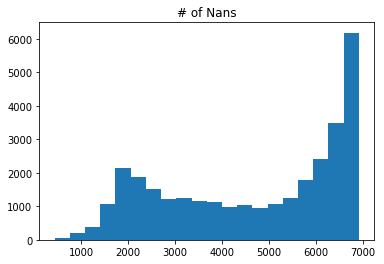

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt.bar(num_nans.keys(), num_nans.values(), color='b')

plt.hist(num_nans_list, bins=20)

plt.title("# of Nans")
plt.show()

